In [1]:
import os 
os.getcwd()
os.chdir(r'C:\Users\MAIN\Desktop\ML\Internship SMinds\Recommender')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df = pd.read_csv("TripAdvReview.csv", na_values=" ")
df.head(n=5)
df.columns
#data wrangling
print('Unique counts:',df.nunique())

print('Kind of ratings:',df.Rating.unique())
#remove extra columns and keep the necessary ones for analysis
df = pd.DataFrame(df.drop(['Bubble_Count', 'Review_Count'], axis=1))
df.head(n=5)
df.columns
#
df.describe()
df.shape
df.size
df.isnull().sum()

Unique counts: Title            846
Bubble_Count       7
Rating             7
Review_Count      70
Review_counts     69
City             327
Province          12
Reviews          570
dtype: int64
Kind of ratings: [5.  4.5 4.  3.5 nan 1.  2.  3. ]


Title              0
Rating           221
Review_counts    281
City               0
Province           0
Reviews          278
dtype: int64

In [3]:
#remove new line characters from variable columns
df = df.replace(r'\n',' ', regex=True)

In [4]:
#remove the numbers in the review column
df.Reviews = df.Reviews.str.replace('\d+', '')

In [5]:
df.head()

,Title,Rating,Review_counts,City,Province,Reviews
0,Vacation/Cottage Rental,5.0,85.0,Niagara Falls,Ontario,mention of vacation rentals This rental felt ...
1,Mistiso's Place Vacation Rentals- Purcell Suite,4.5,100.0,Nelson,British Columbia,mentions of vacation rentals I can't say enou...
2,Toronto 4 Bedroom House Spacious Clean Beautif...,5.0,36.0,Toronto,Ontario,mention of vacation rentals back yard! Would ...
3,Our Sweet Escape,5.0,34.0,Qualicum Beach,British Columbia,mentions of vacation rentals enjoyable. I hav...
4,Walk to ocean from Lyons Cottage Rentals in PEI,4.5,48.0,Stanhope,Prince Edward Island,mentions of vacation rentals quiet morning as...


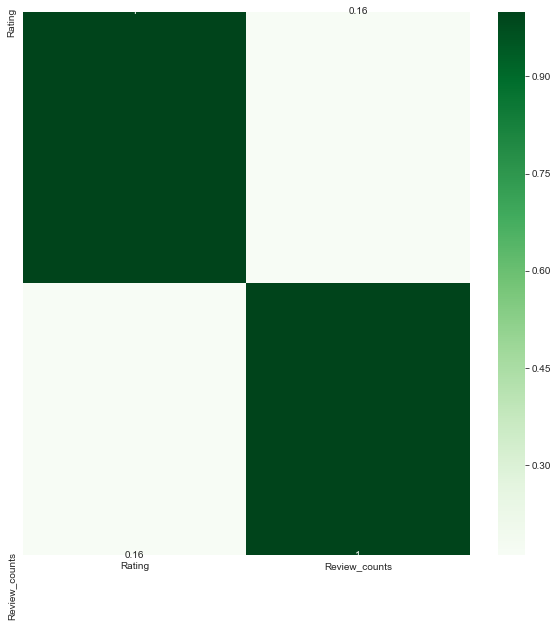

In [6]:
#check correlation with seaborn heatmap
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
#The correlation matrix showed a strong correlation between the repayment status of previous months and the July Payment Status

In [7]:
#Export a semi-cleaned form of the data to be used for exploratory Analysis
export_X = df.to_csv (r'C:\Users\MAIN\Desktop\ML\Internship SMinds\Recommender\X.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [8]:
df = pd.read_csv("X.csv", na_values=" ")

In [9]:
df.head()

,Title,Rating,Review_counts,City,Province,Reviews
0,Vacation/Cottage Rental,5.0,85.0,Niagara Falls,Ontario,mention of vacation rentals This rental felt ...
1,Mistiso's Place Vacation Rentals- Purcell Suite,4.5,100.0,Nelson,British Columbia,mentions of vacation rentals I can't say enou...
2,Toronto 4 Bedroom House Spacious Clean Beautif...,5.0,36.0,Toronto,Ontario,mention of vacation rentals back yard! Would ...
3,Our Sweet Escape,5.0,34.0,Qualicum Beach,British Columbia,mentions of vacation rentals enjoyable. I hav...
4,Walk to ocean from Lyons Cottage Rentals in PEI,4.5,48.0,Stanhope,Prince Edward Island,mentions of vacation rentals quiet morning as...


### Grouping Analytics

In [10]:
#Shows the average ratings of each city and province and the number of reviews obtained from each city
#The higher number of ratings indicates what cities are getting more visits and in which province visits are more
df.groupby(['Province', 'City']).agg({'Rating':'mean','Review_counts':'sum'}).sort_values(by= ['Province','Review_counts'], ascending=False)

Rating  Review_counts
Province      City                                      
 Yukon        Haines Junction    4.500000           14.0
 Saskatchewan Regina             5.000000           24.0
              La Ronge           4.000000            3.0
              Saskatoon          5.000000            0.0
 Quebec       Mont Tremblant     4.882353          450.0
...                                   ...            ...
 Alberta      Calgary            5.000000            6.0
              Chestermere        4.500000            2.0
              Lethbridge         4.500000            2.0
              Banff              5.000000            0.0
              Fort Saskatchewan       NaN            0.0

[329 rows x 2 columns]

In [11]:
#Showing the best performing cities in terms of Review Ratings
a = df.groupby(['City']).agg({'Rating':'mean','Review_counts':'sum'}).sort_values(by= ['Rating'], ascending=False)
b= a[:20] #the 20 best performing cities
print(b)
z= a.tail(20)  #the 20 lowest performing cities
print(z)

                         Rating  Review_counts
City                                          
Algoma Mills                5.0            4.0
Lansdowne                   5.0            8.0
Saskatoon                   5.0            0.0
Salmon Arm                  5.0           12.0
Ladysmith                   5.0           57.0
Saint-Irenee                5.0            3.0
Lake of Bays                5.0           31.0
Lakeshore                   5.0            7.0
Langford                    5.0            6.0
Leamington                  5.0           18.0
Sea View                    5.0           26.0
Saint-Adolphe-d'Howard      5.0           17.0
Little Current              5.0           10.0
Liverpool                   5.0           33.0
Lockeport                   5.0           14.0
Lunenburg                   5.0           82.0
Saint Sauveur des Monts     5.0           36.0
Madeira Park                5.0          130.0
Scotch Creek                5.0           11.0
Shelburne    

In [15]:
#sample Reviews of different Rentals
print(df.Reviews[6])
print(df.Reviews[50])
print(df.Reviews[300])
print(df.Reviews[520])

 mention of vacation rentals vacation spot! There are three levels and so each family got their very own
We enjoyed our stay at this rental property. The hot tub was great
 mention of vacation rentals have no reservations in recommending this vacation rental to my friends.
Terrific cabin, close to all amenities. Amazing vacation. Exceeded
